# Course 1 - Intro

此 notebook 用于存储和练习 TensorFlow Developer Certificate 课程相关内容<br>
https://www.coursera.org/professional-certificates/tensorflow-in-practice

## 最简单的 neural network

In [10]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [11]:
xs = np.array([-1.0,0.0,1.0,2.0,3.0,4.0],dtype=float)
ys = np.array([-3.0,-1.0,1.0,3.0,5.0,7.0],dtype=float)
#最简单的neural net，一个layer，一个unit（也就是一个neuron）
model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
# sgd = stochastic gradient descent
model.compile(optimizer='sgd',loss='mean_squared_error')
model.fit(xs,ys,epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 6ms/step - loss: 32.7426
Epoch 2/500
1/1 [==============================] - 0s 5ms/step - loss: 26.0851
Epoch 3/500
1/1 [==============================] - 0s 6ms/step - loss: 20.8406
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 16.7079
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 13.4502
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 10.8808
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 8.8533
Epoch 8/500
1/1 [==============================] - 0s 5ms/step - loss: 7.2521
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 5.9864
Epoch 10/500
1/1 [==============================] - 0s 11ms/step - loss: 4.9849
Epoch 11/500
1/1 [==============================] - 0s 2ms/step - loss: 4.1913
Epoch 12/500
1/1 [==============================] - 0s 2ms/step - loss: 3.5614
Epoch 13/500
1/1 [==============================] - 0s

In [12]:
print(model.predict([10.0]))

[[18.978647]]


## 简单的 computer vision 神经网络模型

In [15]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [47]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  32  60   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  85 216 144  43
    0   0   0   0   0   0   0  91  54   0]
 [  0   0   0   0   0   0   0   0   0   0   2   0  27 172 200 

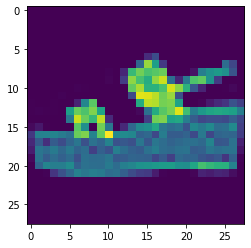

In [48]:
import matplotlib.pyplot as plt
plt.imshow(train_images[12])
# image的pixel数值范围是 0，255
print(train_labels[12])
print(train_images[12])

In [49]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [55]:
model = keras.Sequential(
[
    #第一层layer，使用Flatten把一个个28*28 pixel的图片数据变成线性数值
    keras.layers.Flatten(input_shape=(28,28)),
    #第二层就是hidden layer，里面的数值代表neuron数量
    keras.layers.Dense(1024,activation=tf.nn.relu),
    #第三层layer，数值10表示数据库中输出的图片有10个类别（比如靴子，T恤，裤子等等）
    keras.layers.Dense(10,activation=tf.nn.softmax)
]
)

In [56]:
model.compile(#optimizer=tf.train.AdamOptimizer(), #这一行是v1版本中的代码
             #optimizer=tf.optimizers.Adam(), #v2版本可用
             optimizer = 'Adam',
             loss = 'sparse_categorical_crossentropy'
             )
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4703
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3584
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3188
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2954
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2767


In [39]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3294


0.32938075065612793

In [46]:
classifications = model.predict(test_images)
print(classifications[0])

[1.4223087e-07 5.5423164e-09 8.4919890e-08 2.9905627e-09 2.9066207e-08
 5.2441115e-04 2.6461586e-07 1.6386388e-02 3.9798568e-08 9.8308867e-01]


In [45]:
np.sort(classifications[0],axis=None)

array([2.9905627e-09, 5.5423164e-09, 2.9066207e-08, 3.9798568e-08,
       8.4919890e-08, 1.4223087e-07, 2.6461586e-07, 5.2441115e-04,
       1.6386388e-02, 9.8308867e-01], dtype=float32)

In [41]:
print(test_labels[0])

9


In [59]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs = {}):
        if logs.get('loss') < 0.4:
            print('\n已经达到60%准确率，训练取消。')
            self.model.stop_training = True

callbacks = myCallback()

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs = 5, callbacks = [callbacks])

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4695
Epoch 2/5
1873/1875 [============================>.] - ETA: 0s - loss: 0.3595
已经达到60%准确率，训练取消。
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3593


In [61]:
def train_mnist():

    # YOUR CODE
    import tensorflow as tf

    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            #if(logs.get('acc')>0.99): #此处的 'acc' 适用于 tensorflow 1.x
            if(logs.get('accuracy')>0.99): # 'accuracy' 适用于 tensorflow 2.x
                print("\nReached 99% accuracy so cancelling training!")
                self.model.stop_training = True

    mnist = tf.keras.datasets.mnist

    (x_train, y_train),(x_test, y_test) = mnist.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0

    callbacks = myCallback()

    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(512, activation=tf.nn.relu),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])
    #return history.epoch, history.history['acc'][-1]
    return history.epoch, history.history['accuracy'][-1] # 同理 acc对应1.x版本；accuracy对应2.x版本

train_mnist()

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2006 - accuracy: 0.9407: 0s - loss: 0.208
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0804 - accuracy: 0.9753
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0532 - accuracy: 0.9832
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0366 - accuracy: 0.9881
Epoch 5/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0268 - accuracy: 0.9917
Reached 99% accuracy so cancelling training!
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0267 - accuracy: 0.9918


([0, 1, 2, 3, 4], 0.9917500019073486)

## 卷积神经网络 convolution nn 和 pooling

In [68]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if logs.get('accuracy') > 0.95:
            print('\n已经达到95%准确率，训练结束。')
            self.model.stop_training = True
callbacks = myCallback()    
    
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#因为使用了卷积，所以此处要对数据进行reshape，下同
training_images=training_images.reshape(60000,28,28,1)
training_images=training_images/255.0
#因为使用了卷积，所以此处要对数据进行reshape
test_images=test_images.reshape(10000,28,28,1)
test_images=test_images/255.0

model = tf.keras.models.Sequential([
    # 64意味着使用64个filter，每个filter是3*3的大小。input_shape最后一个数1代表数据的color depth是1，因为都是灰度图片
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
    
]
)
model.summary()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks = [callbacks])

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_38 (Dense)             (None, 10)              

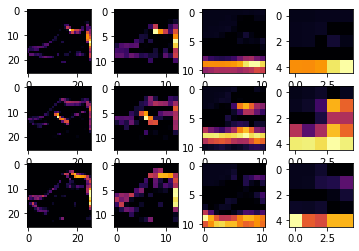

In [67]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE = 0
SECOND_IMAGE = 23
THIRD_IMAGE = 28
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1,28,28,1))[x]
    axarr[0,x].imshow(f1[0,:,:,CONVOLUTION_NUMBER],cmap='inferno')
    axarr[0,x].grid(False)
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1,28,28,1))[x]
    axarr[1,x].imshow(f2[0,:,:,CONVOLUTION_NUMBER],cmap='inferno')
    axarr[1,x].grid(False)
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)

In [72]:
#cv2就是opencv，在python3中pip安装包的名字是opencv-python进行安装
import cv2
import numpy as np
from scipy import misc
# 一个工具包内自带的图片，可用于训练
i = misc.ascent()

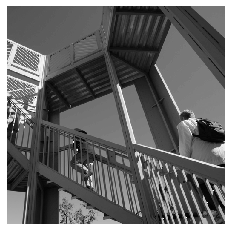

In [74]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [77]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]


In [88]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight
# lines.

#Experiment with different values for fun effects.
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

In [89]:
for x in range(1,size_x - 1):
    for y in range(1,size_y - 1):
        convolution = 0.0
        convolution = convolution + (i[x-1, y-1] * filter[0][0])
        convolution = convolution + (i[x, y-1] * filter[0][1])
        convolution = convolution + (i[x+1, y-1] * filter[0][2])
        convolution = convolution + (i[x-1, y] * filter[1][0])
        convolution = convolution + (i[x, y] * filter[1][1])
        convolution = convolution + (i[x+1, y] * filter[1][2])
        convolution = convolution + (i[x-1, y+1] * filter[2][0])
        convolution = convolution + (i[x, y+1] * filter[2][1])
        convolution = convolution + (i[x+1, y+1] * filter[2][2])
        if(convolution < 0):
            convolution = 0
        if(convolution > 255):
            convolution = 255
        i_transformed[x, y] = convolution

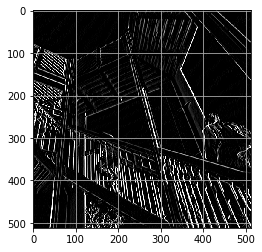

In [90]:
plt.gray()
plt.grid('off')
plt.imshow(i_transformed)
plt.show()

This code will show a (2, 2) pooling. The idea here is to iterate over the image, and look at the pixel and it's immediate neighbors to the right, beneath, and right-beneath. Take the largest of them and load it into the new image. Thus the new image will be 1/4 the size of the old -- with the dimensions on X and Y being halved by this process. You'll see that the features get maintained despite this compression!

<function matplotlib.pyplot.show(*args, **kw)>

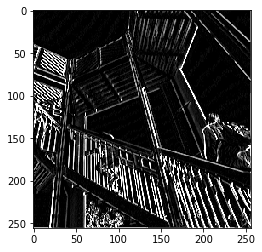

In [93]:
'''pooling 版本'''

new_x = int(size_x / 2)
new_y = int(size_y / 2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
        pixels = []
        #下面四行代表一个 (2,2) 的pooling，也就是一个4个点组成的grid
        pixels.append(i_transformed[x, y])
        pixels.append(i_transformed[x+1, y])
        pixels.append(i_transformed[x, y+1])
        pixels.append(i_transformed[x+1, y+1])
        newImage[int(x/2), int(y/2)] = max(pixels)

plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show

## ImageGenerator

In [1]:
import os

# Directory with our training horse pictures
train_horse_dir = os.path.join('./tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./tmp/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('./tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('./tmp/validation-horse-or-human/humans')

Now, let's see what the filenames look like in the `horses` and `humans` training directories:

In [2]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse43-5.png', 'horse06-5.png', 'horse20-6.png', 'horse04-7.png', 'horse41-7.png', 'horse22-4.png', 'horse19-2.png', 'horse24-2.png', 'horse37-8.png', 'horse02-1.png']
['human17-22.png', 'human10-17.png', 'human10-03.png', 'human07-27.png', 'human09-22.png', 'human05-22.png', 'human02-03.png', 'human02-17.png', 'human15-27.png', 'human12-12.png']
['horse1-204.png', 'horse2-112.png', 'horse3-498.png', 'horse5-032.png', 'horse5-018.png', 'horse1-170.png', 'horse5-192.png', 'horse1-411.png', 'horse4-232.png', 'horse3-070.png']
['valhuman04-20.png', 'valhuman03-01.png', 'valhuman04-08.png', 'valhuman03-15.png', 'valhuman01-04.png', 'valhuman01-10.png', 'valhuman01-11.png', 'valhuman01-05.png', 'valhuman03-14.png', 'valhuman03-00.png']


In [8]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


Now let's take a look at a few pictures to get a better sense of what they look like. First, configure the matplot parameters:

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 horse and 8 human pictures. You can rerun the cell to see a fresh batch each time:

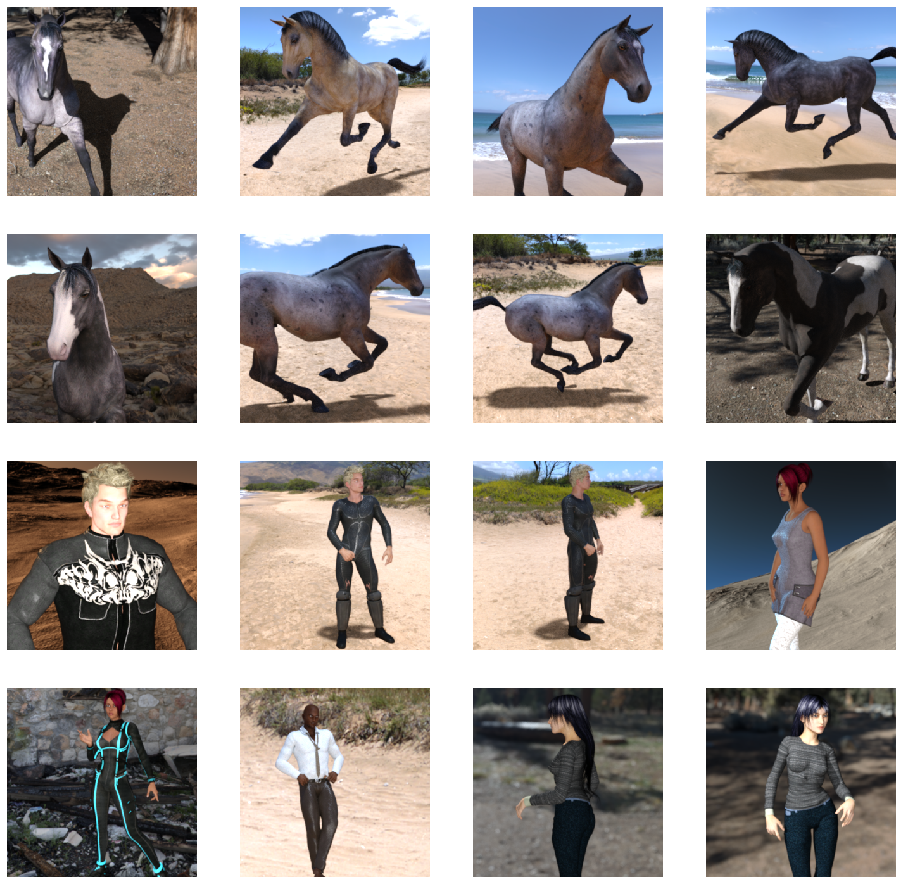

In [10]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


In [13]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 33, 33, 64)       

In [15]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(lr = 0.001),
             metrics = ['accuracy']
             )

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)
validation_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    './tmp/horse-or-human/',
    target_size = (300,300),
    batch_size = 32,
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    './tmp/validation-horse-or-human/',
    target_size = (300,300),
    batch_size = 32,
    class_mode = 'binary'
)


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [18]:
hisory = model.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 15,
    verbose = 1,
    validation_data = validation_generator,
    validation_steps = 8
)

Epoch 1/15
8/8 [==============================] - 16s 2s/step - loss: 0.7881 - accuracy: 0.5547 - val_loss: 0.6083 - val_accuracy: 0.8555
Epoch 2/15
8/8 [==============================] - 22s 3s/step - loss: 0.6469 - accuracy: 0.7048 - val_loss: 0.6622 - val_accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - 21s 3s/step - loss: 0.6561 - accuracy: 0.5859 - val_loss: 0.4491 - val_accuracy: 0.8906
Epoch 4/15
8/8 [==============================] - 18s 2s/step - loss: 0.4942 - accuracy: 0.8086 - val_loss: 1.0641 - val_accuracy: 0.8047
Epoch 5/15
8/8 [==============================] - 18s 2s/step - loss: 0.3147 - accuracy: 0.8945 - val_loss: 0.9719 - val_accuracy: 0.8086
Epoch 6/15
8/8 [==============================] - 17s 2s/step - loss: 0.7955 - accuracy: 0.8018 - val_loss: 0.6873 - val_accuracy: 0.8008
Epoch 7/15
8/8 [==============================] - 19s 2s/step - loss: 0.2297 - accuracy: 0.9062 - val_loss: 0.7664 - val_accuracy: 0.8438
Epoch 8/15
8/8 [==================

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
    # predicting images
    path = '.tmp/test/' + fn
    img = image.load_img(path, target_size=(300, 300))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(fn + " is a human")
    else:
        print(fn + " is a horse")
 

### Visualizing Intermediate Representations

To get a feel for what kind of features our convnet has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the convnet.

Let's pick a random image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

/Users/xiucat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


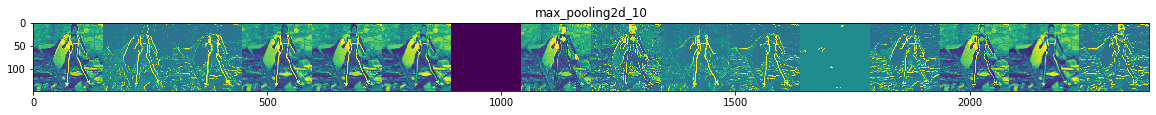

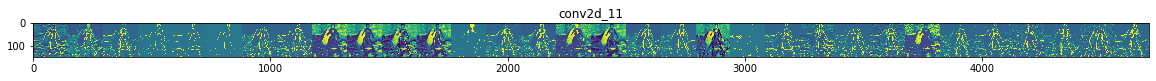

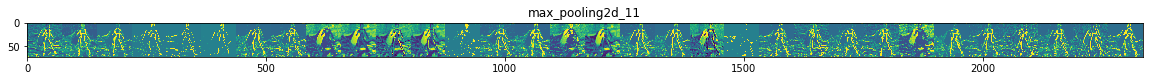

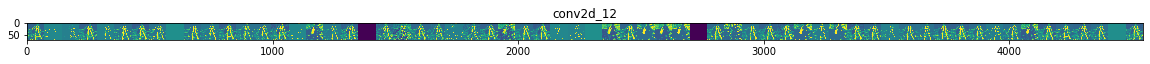

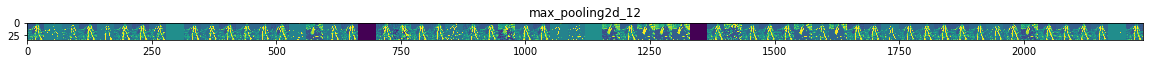

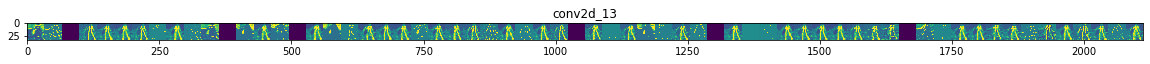

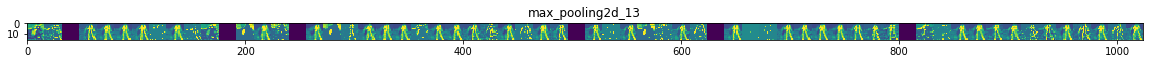

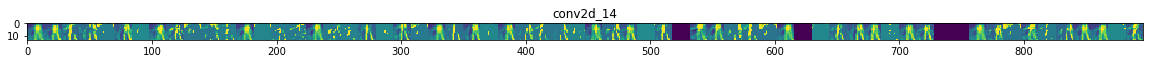

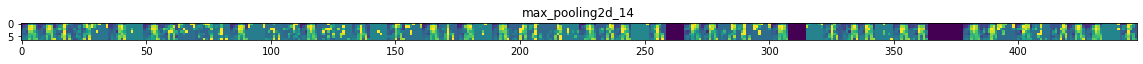

In [21]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in feature map
        # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            # Postprocess the feature to make it visually palatable
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            # We'll tile each filter into this big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x
        # Display the grid
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Course 2 - Convolution Neural Network

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [2]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)
train_generator = train_datagen.flow_from_directory(
    '../Data/dogs-vs-cats_train/',
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    '../Data/dogs-vs-cats_validation/',
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (2,2), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

from tensorflow.keras.optimizers import RMSprop
model.compile(
    loss = 'binary_crossentropy',
    optimizer = RMSprop(lr = 0.001),
    metrics = ['accuracy']
)

Found 25000 images belonging to 1 classes.
Found 12500 images belonging to 1 classes.


In [3]:
'''Course2 Week1, Working through the notebook 看到 2:13'''

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 35, 35, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch = 100,
    epochs = 15,
    validation_data = validation_generator,
    validation_steps = 50,
    verbose = 1
)

Epoch 1/15
100/100 [==============================] - 46s 460ms/step - loss: 2.6478e-09 - accuracy: 1.0000 - val_loss: 7.3138e-11 - val_accuracy: 1.0000
Epoch 2/15
100/100 [==============================] - 46s 464ms/step - loss: 1.7640e-11 - accuracy: 1.0000 - val_loss: 1.1549e-11 - val_accuracy: 1.0000
Epoch 3/15
 59/100 [================>.............] - ETA: 17s - loss: 1.6813e-10 - accuracy: 1.0000

KeyboardInterrupt: 

In [9]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

NameError: name 'history' is not defined

## dogs-vs-cats augmentation

In [4]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


base_dir = '../Data/cats_and_dogs_filtered/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss = 'binary_crossentropy',
    optimizer = RMSprop(lr = 1e-4),
    metrics = ['accuracy']
)

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=1,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

model.save('my_model')
model.save('my_h5_model.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
100/100 [==============================] - 47s 468ms/step - loss: 0.6941 - accuracy: 0.5355 - val_loss: 0.6774 - val_accuracy: 0.6060
INFO:tensorflow:Assets written to: my_model/assets


In [2]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4
pic_index = 0

In [4]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.952.jpg', 'cat.946.jpg', 'cat.6.jpg', 'cat.749.jpg', 'cat.991.jpg', 'cat.985.jpg', 'cat.775.jpg', 'cat.761.jpg', 'cat.588.jpg', 'cat.239.jpg']
['dog.775.jpg', 'dog.761.jpg', 'dog.991.jpg', 'dog.749.jpg', 'dog.985.jpg', 'dog.952.jpg', 'dog.946.jpg', 'dog.211.jpg', 'dog.577.jpg', 'dog.563.jpg']


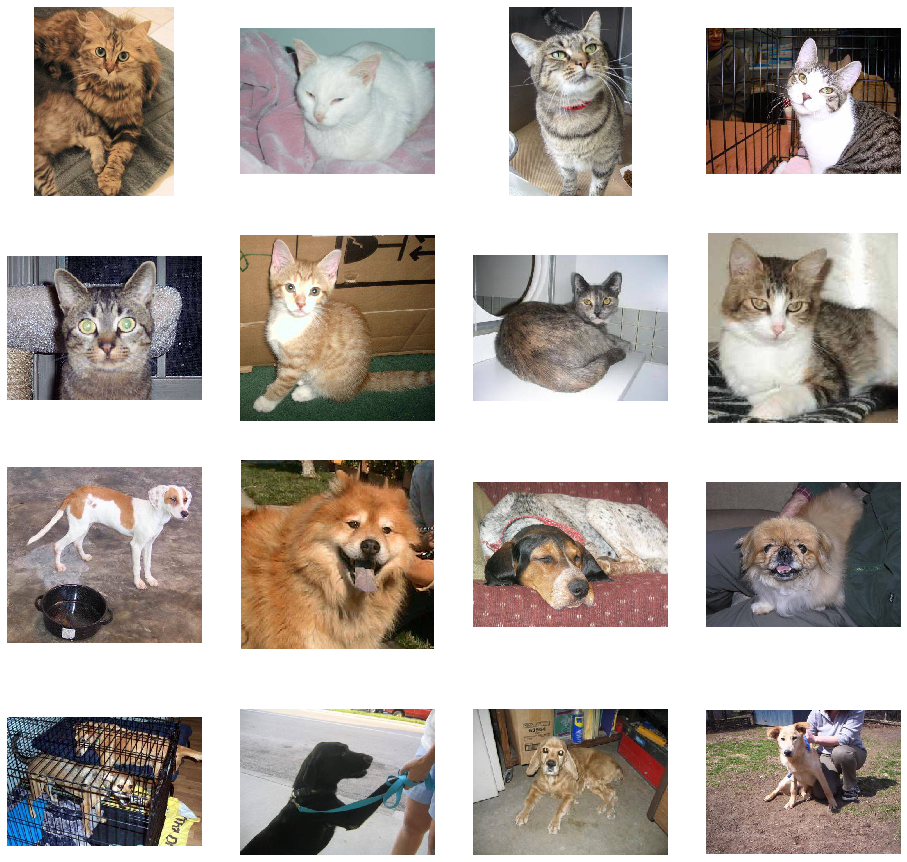

In [6]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

## 使用 filtered 猫狗图包进行plot，看train和validation的曲线图

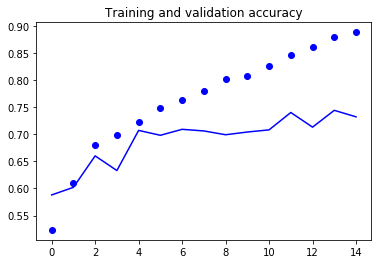

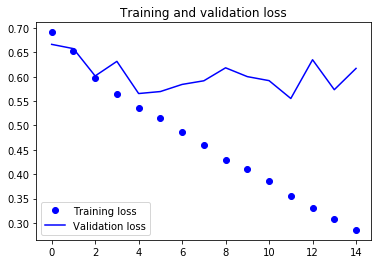

In [8]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Augmentation 对少量数据集进行增强的方法

In [ ]:
import tensorflow as tf
from tensorflow.keras.preproccessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range = 0.2, #避免因为dataset中对象都在相似位置（比如居中）而导致overfitting
    height_shift_Range = 0.2, #同上
    shear_range = 0.2, #变形
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


base_dir = '../Data/cats_and_dogs_filtered/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss = 'binary_crossentropy',
    optimizer = RMSprop(lr = 1e-4),
    metrics = ['accuracy']
)

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/15
100/100 [==============================] - 121s 1s/step - loss: 0.6930 - accuracy: 0.5325 - val_loss: 0.6839 - val_accuracy: 0.5970
Epoch 2/15
100/100 [==============================] - 112s 1s/step - loss: 0.6858 - accuracy: 0.5550 - val_loss: 0.6731 - val_accuracy: 0.5920
Epoch 3/15
100/100 [==============================] - 125s 1s/step - loss: 0.6755 - accuracy: 0.5865 - val_loss: 0.6523 - val_accuracy: 0.6360
Epoch 4/15
100/100 [==============================] - 128s 1s/step - loss: 0.6589 - accuracy: 0.6150 - val_loss: 0.6393 - val_accuracy: 0.6220
Epoch 5/15
100/100 [==============================] - 109s 1s/step - loss: 0.6464 - accuracy: 0.6325 - val_loss: 0.6329 - val_accuracy: 0.6350
Epoch 6/15
100/100 [==============================] - 129s 1s/step - loss: 0.6313 - accuracy: 0.6440 - val_loss: 0.6213 - val_accuracy: 0.6410
Epoch 7/15
100/100 [==============================] - 134s

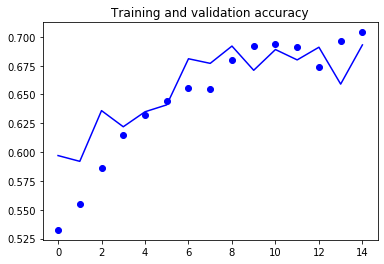

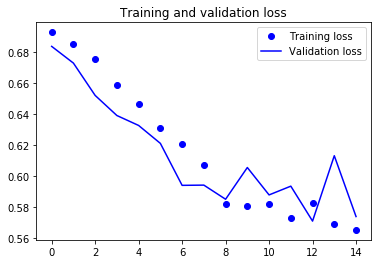

In [2]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Transfer Learning 迁移学习

In [24]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model

In [25]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
local_weights_file = './inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(
    input_shape = (150,150,3),
    include_top = False,
    weights = None
)
pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False
#pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_192 (Conv2D)             (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 74, 74, 32)   96          conv2d_192[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 74, 74, 32)   0           batch_normalization_188[0][0]    
_______________________________________________________________________________________

In [26]:
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output


In [27]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation = 'relu')(x)
x = layers.Dropout(0.2)(x) # 加入 dropout，避免相邻neuron的weight过度相似导致overfitting
x = layers.Dense(1, activation = 'sigmoid')(x)
model = Model(pre_trained_model.input, x)
model.compile(optimizer = RMSprop(lr = 0.001), loss = 'binary_crossentropy' ,metrics = ['acc'])

In [28]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [29]:
train_generator = train_datagen.flow_from_directory(
    '../Data/cats-v-dogs/training/',
    batch_size = 20,
    class_mode = 'binary',
    target_size = (150,150)
)

validation_generator = validation_datagen.flow_from_directory(
    '../Data/cats-v-dogs/testing/',
    batch_size = 20,
    class_mode = 'binary',
    target_size = (150,150)
)

Found 2700 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [30]:
history = model.fit_generator(
    train_generator,
    validation_data = validation_generator,
    verbose = 1,
    steps_per_epoch = 100,
    epochs = 50,
    validation_steps = 50
)

Epoch 1/50
100/100 [==============================] - 94s 937ms/step - loss: 1.5537 - acc: 0.8285 - val_loss: 0.4628 - val_acc: 0.8733
Epoch 2/50
100/100 [==============================] - 77s 772ms/step - loss: 0.4142 - acc: 0.8980
Epoch 3/50
100/100 [==============================] - 77s 772ms/step - loss: 0.3860 - acc: 0.9030
Epoch 4/50
100/100 [==============================] - 79s 788ms/step - loss: 0.3157 - acc: 0.9110
Epoch 5/50
100/100 [==============================] - 78s 776ms/step - loss: 0.2764 - acc: 0.9185
Epoch 6/50
100/100 [==============================] - 78s 784ms/step - loss: 0.2697 - acc: 0.9205
Epoch 7/50
100/100 [==============================] - 83s 825ms/step - loss: 0.2696 - acc: 0.9215
Epoch 8/50
100/100 [==============================] - 85s 849ms/step - loss: 0.2687 - acc: 0.9250
Epoch 9/50
100/100 [==============================] - 90s 903ms/step - loss: 0.2787 - acc: 0.9215
Epoch 10/50
100/100 [==============================] - 83s 831ms/step - loss: 0.2

ValueError: x and y must have same first dimension, but have shapes (50,) and (1,)

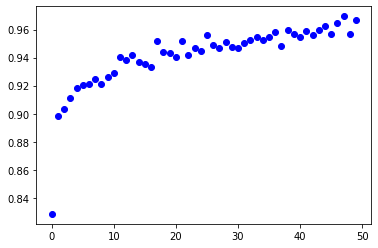

In [31]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## 多类别分类 Moving from binary to multi-class classification

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

train_datagen = ImageDataGenerator(rescale = 1/255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = 128,
    target_size = (300,300),
    class_mode = 'categorical'
)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    # 对于多重分类，比如类别数量为3，则将output layer的neuron数量设置为3，激活函数activation使用softmax。
    # 这样的效果是对三个类别分别取其概率，判断哪个类别概率最高。三个概率值的和为1.
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer = RMSprop(lr = 0.001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'],
)

# Course 3 - Natural Language Processing in TensorFlow

## tokenizer and pad sequences

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(num_words = 100, oov_token = '<OOV>') # oov_token: out of vocabulary, 自定义的虚拟词汇，用来代替此表中没有的单词。可随意指定oov的值，比如此处为 <OOV>
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences)
# maxlen = 5(每个sentence的字数上限)，默认从句头删减，
# 如果需要从句末删减，可以在maxlen后面使用 truncating = 'pre'
# 如果数据中有句子的len不足maxlen，则默认在结尾加0补足
padded = pad_sequences(sequences) #, padding = 'post', maxlen = 6, truncating = 'post'

print(word_index)
print(sequences)
print(padded)



{'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}
[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]
[[ 0  0  0  5  3  2  4]
 [ 0  0  0  5  3  2  7]
 [ 0  0  0  6  3  2  4]
 [ 8  6  9  2  4 10 11]]


In [2]:
test_data = [
    'i really love my dog',
    'my dog loves my manatee'
]

test_seq = tokenizer.texts_to_sequences(test_data)
print(test_seq)

[[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]


In [15]:
import json
file = open('../Data/sarcasm.json', 'r')
datastore = []
# 因为json.loads只能读取一行，读取多行数据会报错，所以使用readlines()逐行读取然后append到list中
for line in file.readlines():
    datastore.append(json.loads(line))

sentences = []
labels = []
urls = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token = '<OOV>')
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
print(len(word_index))
#print(word_index)
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding = 'pre')

print(sentences[3])
print(padded[3])
print(padded.shape)

JSONDecodeError: Expecting value: line 2 column 1 (char 2)

## IMDB dataset

In [2]:
'''IMDB dataset'''

import tensorflow as tf
#print(tf.__version__)
import tensorflow_datasets as tfds

imdb, info = tfds.load('imdb_reviews', with_info = True, as_supervised = True)

In [3]:
import numpy as np
train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

#在 python3 里需要 str(s.numpy())
for s,l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())
    
for s,l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())

In [4]:
# 改成 np.array 用于训练
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [5]:
training_labels_final

array([0, 0, 0, ..., 0, 0, 1])

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'

tokenizer = Tokenizer(num_words = vocab_size, oov_token =oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen = max_length, truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length)

In [7]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) #把dict中key和value的位置对调
reverse_word_index

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_review(padded[1]))
print(training_sentences[1])

? ? ? ? ? ? ? b'i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the <OOV> and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant constantly slow and boring things seemed to happen but with no explanation of what was causing them or why i admit i may have missed part of the film but i watched the majority of it and everything just seemed to happen of its own <OOV> without any real concern for anything else i cant recommend this film at all '
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of 

In [8]:
#embedding 把相邻词语做cluster并进行embed

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    #tf.keras.layers.Flatten(), #flatten 之后的output shape仍然很大，可以用下一行替代
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation ='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [9]:
'''看到 week 2，more into details'''

model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])
model.summary()




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 102       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 160,109
Trainable params: 160,109
Non-trainable params: 0
_________________________________________________________________


In [10]:
num_epoch = 10
model.fit(padded,
         training_labels_final,
          epochs = num_epoch,
          validation_data = (testing_padded, testing_labels_final)
         )

Epoch 1/10
782/782 [==============================] - 3s 4ms/step - loss: 0.5577 - accuracy: 0.7508 - val_loss: 0.3952 - val_accuracy: 0.8366
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 0.3394 - accuracy: 0.8590 - val_loss: 0.3334 - val_accuracy: 0.8572
Epoch 3/10
782/782 [==============================] - 3s 4ms/step - loss: 0.2766 - accuracy: 0.8893 - val_loss: 0.3296 - val_accuracy: 0.8577
Epoch 4/10
782/782 [==============================] - 3s 4ms/step - loss: 0.2404 - accuracy: 0.9055 - val_loss: 0.3402 - val_accuracy: 0.8542
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 0.2145 - accuracy: 0.9175 - val_loss: 0.3577 - val_accuracy: 0.8500
Epoch 6/10
782/782 [==============================] - 3s 4ms/step - loss: 0.1931 - accuracy: 0.9290 - val_loss: 0.3900 - val_accuracy: 0.8398
Epoch 7/10
782/782 [==============================] - 3s 4ms/step - loss: 0.1760 - accuracy: 0.9360 - val_loss: 0.4120 - val_accuracy: 0.8366
Epoch 

In [11]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) #embedding layer的 weight

(10000, 16)


In [19]:
import io
out_v = io.open('vecs.tsv', 'w', encoding = 'utf-8')
out_m = io.open('meta.tsv', 'w', encoding = 'utf-8')

for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + '\n')
    out_v.write('\t'.join([str(x) for x in embeddings]) + '\n')
out_v.close()
out_m.close()

In [18]:
from google.colab import files
files.download('vecs.tsv')
files.download('meta.tsv')

/Users/xiucat/anaconda3/lib/python3.6/site-packages/google/colab/data_table.py:30: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  from IPython.utils import traitlets as _traitlets


KeyboardInterrupt: 

## sarcasm dataset

In [22]:
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# sarcasm.json
# https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
with open('../Data/sarcasm.json', 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [31]:
training_size = int(len(sentences)*0.7)
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [30]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences)


'''Building a classifier for the sarcasm dataset 看到 29秒'''

18696

26709